In [3]:
import cv2
import numpy as np
from matplotlib.pyplot import imshow

In [12]:
from google.colab.patches import cv2_imshow

In [17]:
image = cv2.imread("cup.jpeg")

In [18]:
def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        # calculate the ratio of the width and construct the dimensions
        r = width / float(w)
        dim = (width, int(h * r))
        
    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized

In [19]:
resized = resize(image, width=150)

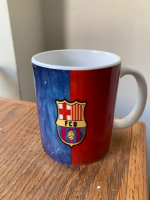

-1

In [21]:

cv2_imshow(resized)
cv2.waitKey(0)

In [22]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

In [23]:
blurred = cv2.GaussianBlur(gray, (5,5), 0)

In [24]:
blurred_crop = blurred[:,48:98]

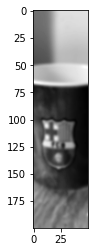

In [25]:
imshow(blurred_crop, cmap='gray')

### Trying simple thresholding technique

In [26]:
(T, thresh) = cv2.threshold(blurred_crop, 111, 255, cv2.THRESH_BINARY)

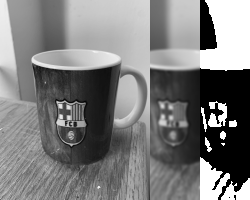

-1

In [28]:
cv2_imshow(np.hstack([gray, blurred_crop, thresh]))
cv2.waitKey(0)

In [29]:
(T, threshInv) = cv2.threshold(blurred_crop, 120, 255, cv2.THRESH_BINARY_INV)

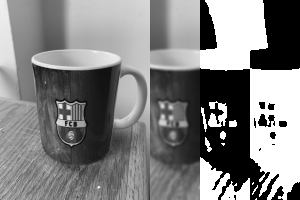

-1

In [31]:
cv2_imshow(np.hstack([gray, blurred_crop, thresh, threshInv]))
cv2.waitKey(0)

### Trying adaptive thresholding_mean technique

In [32]:
thresh = cv2.adaptiveThreshold(blurred_crop, 
                               255, 
                               cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               41, 
                               4
)

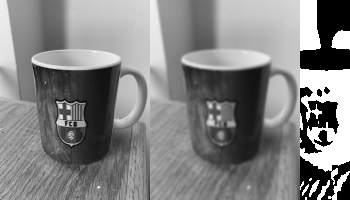

-1

In [34]:
cv2_imshow(np.hstack([gray, blurred, thresh]))
cv2.waitKey(0)

### Trying adaptive thresholding_gaussian technique

In [35]:
gaussianthresh = cv2.adaptiveThreshold(blurred_crop, 
                               255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               91, 
                               3
)

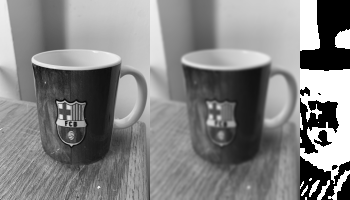

-1

In [37]:
cv2_imshow(np.hstack([gray, blurred, gaussianthresh]))
cv2.waitKey(0)

### trying otsu thresholding technique

In [40]:
!pip install mahotas
import mahotas

     |████████████████████████████████| 5.7 MB 4.4 MB/s 


In [41]:
T = mahotas.thresholding.otsu(blurred)

In [ ]:
T

In [43]:
otsu_img = blurred.copy()

In [44]:
otsu_img[otsu_img > T] = 255

In [45]:
otsu_img[otsu_img < 255] = 0

In [46]:
otsu_img = cv2.bitwise_not(otsu_img)

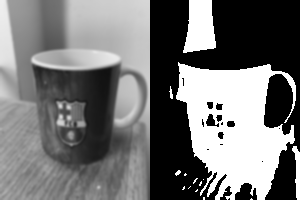

-1

In [47]:
cv2_imshow(np.hstack([blurred, otsu_img]))
cv2.waitKey(0)

### Trying Riddler-calvard threshoolding

121.72198487415824


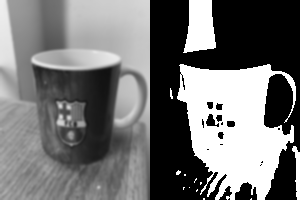

-1

In [49]:
T_RC = mahotas.thresholding.rc(blurred)

print(T_RC)

thresh_RC = blurred.copy()

thresh_RC[thresh_RC > T_RC] = 255

thresh_RC[thresh_RC < 255] = 0

thresh_RC = cv2.bitwise_not(thresh_RC)

cv2_imshow(np.hstack([blurred, thresh_RC]))
cv2.waitKey(0)

### Extract Foreground(Using simple thresInv, as it is the most suitable in this use case)

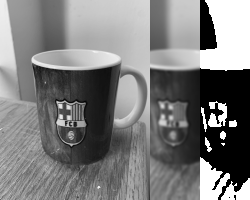

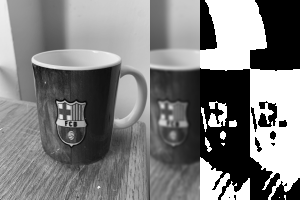

-1

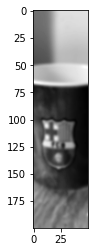

In [50]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5,5), 0)

blurred_crop = blurred[:,48:98]

imshow(blurred_crop, cmap='gray')

### Trying simple thresholding technique

(T, thresh) = cv2.threshold(blurred_crop, 111.28, 255, cv2.THRESH_BINARY)

cv2_imshow(np.hstack([gray, blurred_crop, thresh]))
cv2.waitKey(0)

(T, threshInv) = cv2.threshold(blurred_crop, 111.28, 255, cv2.THRESH_BINARY_INV)

cv2_imshow(np.hstack([gray, blurred_crop, thresh, threshInv]))
cv2.waitKey(0)

In [51]:
resized_crop=resized[:,48:98]

In [52]:
foreground = cv2.bitwise_and(resized_crop, resized_crop, mask = threshInv)

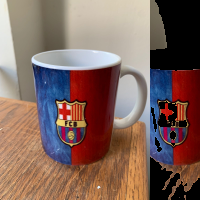

-1

In [53]:
cv2_imshow(np.hstack([resized, foreground]))
cv2.waitKey(0)

In [54]:
cv2.imwrite('extracted.jpeg', foreground)

True